# **K-means clustering (K-평균 군집화)**

# **1.K-means clustering 이란?**
- #### **데이터를 유사한 그룹(군집)으로 나누기 위해, 각 데이터 포인트를 그룹의 중심점(centroid)을 기준으로 분할하는 방법**

- #### **군집의 수를 지정해야 함**
- #### **각 군집의 중심을 centroid라고 함**
- #### **아래의 수식을 만족하는 중심점을 찾는 것이 목표**

#### <span style="font-weight: bold;">$$\sum_{{i=0}}^{{n}} \underset{{\mu_j \in C}}{{\min}} \left( ||x_i - \mu_j||^2 \right)$$</span>

<img src="../image/Kmeans.png">

# **2.실습**

## **2-1.필요한 라이브러리 임포트**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 정규화 패키지
from sklearn.preprocessing import StandardScaler

# 군집분석 관련 패키지
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 차원축소를 위한 패키지
from sklearn.decomposition import PCA

## **2-2. 데이터셋 설명 (Breast cancer dataset)**
- **X 변수: 유방암의 물리적 특성과 세포학적 특성을 나타내는 30개의 수치형 변수**
- **Y 변수: 종양의 상태를 나타내는 1개의 카테고리형 변수 (2개 클래스: 양성(0) / 악성(1))**

## **2-3.데이터 로드 및 전처리**

In [37]:
# 유방암 데이터셋 로드
cancer_df = pd.read_csv("../Data/breast_cancer_data.csv")
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
# 데이터 스케일링
X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **2-4.K의 값(군집의 수) 설정**

In [39]:
# K-Means 클러스터링 모델 생성 및 학습, 군집의 수 정해주기
model_cancer = cluster.KMeans(n_clusters=2, random_state=42)
model_cancer.fit(X_scaled)

# 클러스터 예측
clusters = model_cancer.predict(X_scaled)

## **2-5.주성분 분석(PCA)을 사용**
- **고차원 데이터는 사람이 해석하기 어려움**
- **Principal Components Analysis는(PCA)는 데이터의 분산(정보량)을 최대한 보존하면서 저차원으로 투영하여 해석**

In [40]:
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## **2-6.시각화**

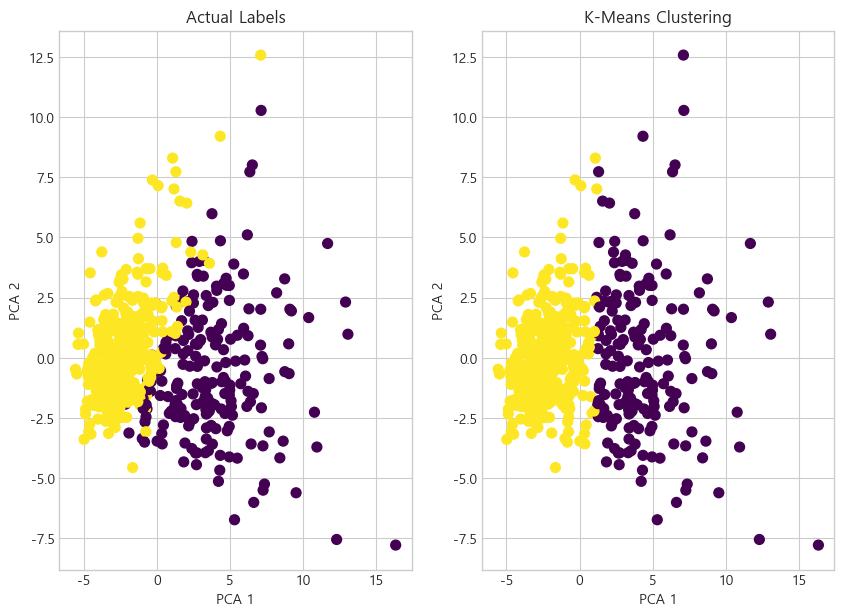

In [41]:
plt.figure(figsize=(10, 7))

# 실제 레이블에 따른 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", s=50)
plt.title("Actual Labels")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# K-Means 클러스터링 결과에 따른 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()

## **2-7.결과 평가**

In [42]:
# 실루엣 스코어 계산
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"K-Means 군집화의 실루엣 스코어: {silhouette_avg:.4f}")

K-Means 군집화의 실루엣 스코어: 0.3450


## **2-8.엘보우 포인트를 활용한 최적의 군집 수 탐색**

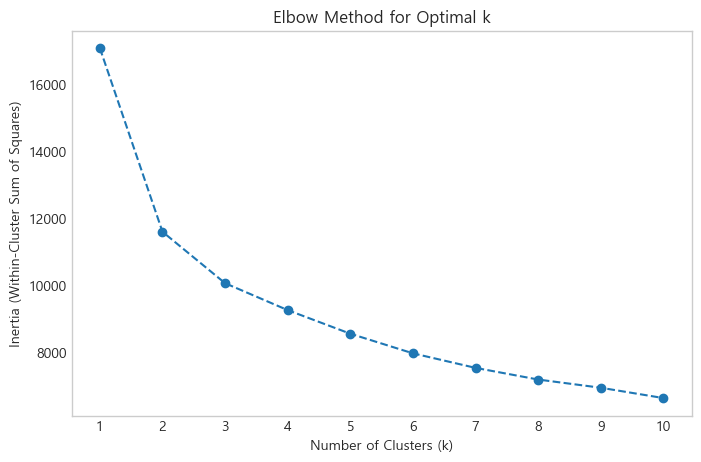

In [43]:
# 엘보우 포인트를 위한 k 값의 범위 설정
k_values = range(1, 11)  # k를 1부터 10까지 시도
inertia = []  # 각 k에 대한 이너셔 값을 저장할 리스트

# 다양한 k 값에 대해 KMeans 모델 학습 및 이너셔 기록
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)  # KMeans 모델 생성
    model.fit(X_scaled)  # 스케일링된 데이터 학습
    inertia.append(model.inertia_)  # 관성(Inertia) 값 기록

# 엘보우 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')  # 이너셔 값 시각화
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.xticks(k_values)  # x축 눈금을 k 값으로 설정
plt.show()

# **3.실습(shadowing)**

## **3-1. 데이터셋 설명 (Wine dataset)**
- **X 변수: 와인의 화학적 특성을 나타내는 13개의 수치형 변수**
- **Y 변수: 와인의 종류를 나타내는 1개의 카테고리형 변수 (3개 클래스: (0) / (1) / (2))**

## **3-2.데이터 로드 및 전처리**

In [ ]:
# 와인 데이터셋 로드

In [ ]:
# 데이터 스케일링


## **3-3.K의 값(군집의 수) 설정**

In [ ]:
# K-Means 클러스터링 모델 생성 및 학습, 군집의 수 정해주기


# 클러스터 예측


## **3-4.주성분 분석(PCA)**

In [ ]:
# PCA를 사용하여 2차원으로 축소


## **3-5.시각화**

In [ ]:
# 시각화

# 실제 레이블에 따른 시각화


# K-Means 클러스터링 결과에 따른 시각화


## **3-6.결과평가**

In [ ]:
# 실루엣 스코어 계산


K-Means 군집화의 실루엣 스코어: 0.2849


## **3-7.엘보우 포인트를 활용한 최적의 군집 수 탐색**

In [ ]:
# 엘보우 포인트를 위한 k 값의 범위 설정
